# Problem Statement

The Society of Professional Journalists hired The East-West Alliance (TEWA) as consultants to create a model that predicts and classifies articles as either fake or real based on the title and content of the news article. The goal aims to mitigate the spread of misinformation and promote accountability in the media.  It would help out social media sites like Facebook and Twitter to filter out spam and/or fake stories that would make a culpable person believe them.

# Imports

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Read Data

In [196]:
Fake_df = pd.read_csv('./Data/Fake.csv')
Fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [197]:
Fake_df['target'] = 1

In [198]:
True_df = pd.read_csv('./Data/True.csv')
True_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [199]:
True_df['target'] = 0

In [200]:
Fake_df.shape[0] + True_df.shape[0]

44898

In [201]:
Full_df = pd.concat([Fake_df,True_df],)
Full_df.shape

(44898, 5)

In [202]:
Full_df.reset_index(inplace=True)

In [203]:
Full_df.drop(columns="index", inplace=True)

In [204]:
Full_df

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [205]:
Full_df["all_text"] = Full_df["title"] + " " + Full_df["text"]

In [206]:
Full_df

,title,text,subject,date,target,all_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0,'Fully committed' NATO backs new U.S. approach...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0,LexisNexis withdrew two products from Chinese ...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0,Minsk cultural hub becomes haven from authorit...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0,Vatican upbeat on possibility of Pope Francis ...


# EDA

#### Custom Stop Words

In [231]:
my_words=["said",'trump','reuters', 'hilary', "president", "united", "states", "state", "government", "getty images", "people", "told", "people", "percent", "featured news" ]
my_stop_words=ENGLISH_STOP_WORDS.union(my_words)

##### Unigram - Fake News Set

In [207]:
Fake_df_txt=Full_df[Full_df['target']==1]['all_text']

In [208]:
cvec_ms = CountVectorizer(
                        min_df = 3,
                        max_features = 5000,
                        stop_words='english'
                      )
# Fit our vectorizier on our corpus
cvec.fit(Fake_df_txt)
# Transform the corpus
Fake_df_txt = cvec.transform(Fake_df_txt)

In [209]:
Fake_df_txt

<23481x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 2946096 stored elements in Compressed Sparse Row format>

In [210]:
#Sparse Matrix to DataFrame
Fake_df_txt = pd.DataFrame(Fake_df_txt.todense(), 
                          columns=cvec.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [211]:
Fake_df_txt

,00,000,10,100,11,12,13,14,15,150,...,york,young,younger,youth,youtu,youtube,yr,zero,zone,zones
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23476,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
23477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23478,0,2,0,2,0,0,0,1,1,0,...,2,0,0,0,0,0,0,1,14,0
23479,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, 'Frequency')

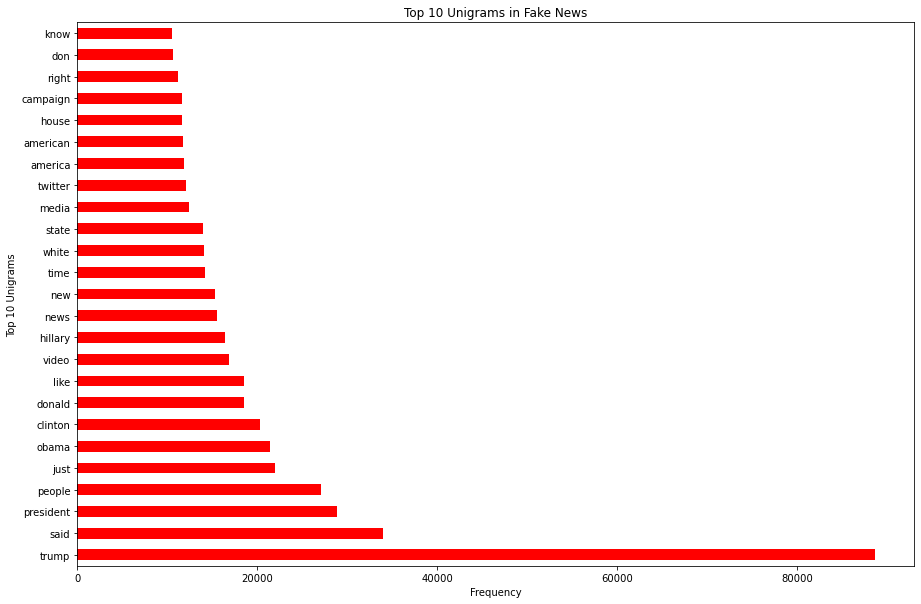

In [212]:
# Plot of top occuring words across all documents - a lot of these are stop words - articles
plt.figure(figsize=(15,10))
Fake_df_txt.sum().sort_values(ascending=False).head(25).plot(kind='barh', color='red')
plt.title("Top 10 Unigrams in Fake News", c='black', horizontalalignment='center')
plt.ylabel("Top 10 Unigrams", size=10, c='black')
plt.xlabel("Frequency", c="black")
# plt.savefig('./images/z_10_bigrams_stopwords.png');

##### Unigram - True News Set

In [213]:
True_df_txt=Full_df[Full_df['target']==0]['all_text']

In [214]:
cvec1 = CountVectorizer(
                        min_df = 3,
                        max_features = 5000,
                        stop_words='english'
                      )
# Fit our vectorizier on our corpus
cvec1.fit(True_df_txt)
# Transform the corpus
True_df_txt = cvec1.transform(True_df_txt)

In [215]:
True_df_txt

<21417x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 2711988 stored elements in Compressed Sparse Row format>

In [216]:
#Sparse Matrix to DataFrame
True_df_txt = pd.DataFrame(True_df_txt.todense(), 
                          columns=cvec1.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [217]:
True_df_txt

,000,10,100,11,12,120,13,130,14,15,...,zealand,zeid,zero,zika,zimbabwe,zinke,zone,zones,zor,zuma
0,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,2,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, 'Frequency')

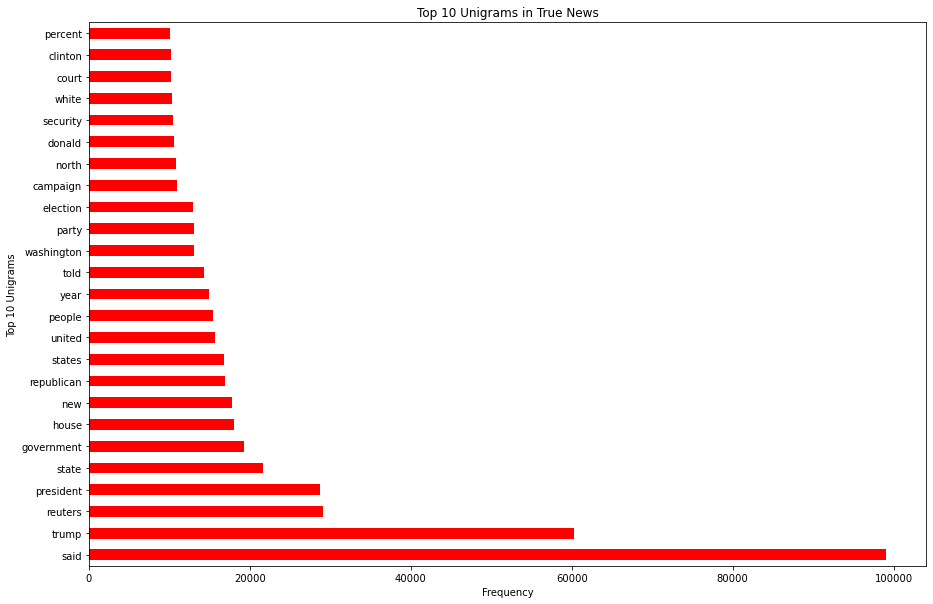

In [218]:
# Plot of top occuring words across all documents - a lot of these are stop words - articles
plt.figure(figsize=(15,10))
True_df_txt.sum().sort_values(ascending=False).head(25).plot(kind='barh', color='red')
plt.title("Top 10 Unigrams in True News", c='black', horizontalalignment='center')
plt.ylabel("Top 10 Unigrams", size=10, c='black')
plt.xlabel("Frequency", c="black")
# plt.savefig('./images/z_10_bigrams_stopwords.png');

#### Unigram - Full Set

In [219]:
Full_df_txt=Full_df['all_text']

In [220]:
cvec2 = CountVectorizer(
                        min_df = 3,
                        max_features = 5000,
                        stop_words='english'
                      )
# Fit our vectorizier on our corpus
cvec2.fit(Full_df_txt)
# Transform the corpus
Full_df_txt = cvec2.transform(Full_df_txt)

In [221]:
Full_df_txt

<44898x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 5562512 stored elements in Compressed Sparse Row format>

In [222]:
#Sparse Matrix to DataFrame
Full_df_txt = pd.DataFrame(Full_df_txt.todense(), 
                          columns=cvec2.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [223]:
Full_df_txt

,00,000,10,100,11,12,120,13,14,15,...,youtube,ypg,zealand,zero,zika,zimbabwe,zone,zones,zor,zuma
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,0,2,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
44894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, 'Frequency')

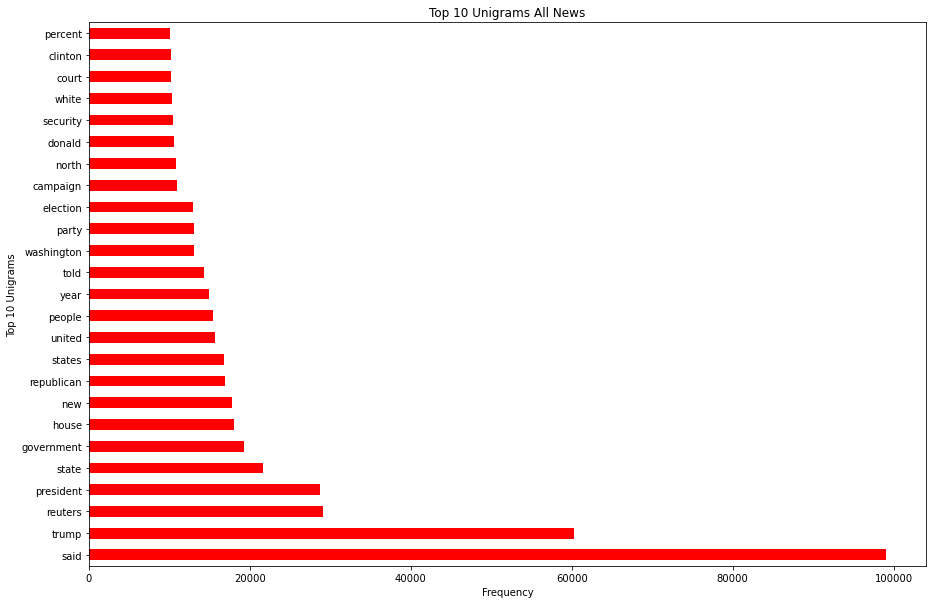

In [224]:
# Plot of top occuring words across all documents - a lot of these are stop words - articles
plt.figure(figsize=(15,10))
True_df_txt.sum().sort_values(ascending=False).head(25).plot(kind='barh', color='red')
plt.title("Top 10 Unigrams All News", c='black', horizontalalignment='center')
plt.ylabel("Top 10 Unigrams", size=10, c='black')
plt.xlabel("Frequency", c="black")
# plt.savefig('./images/z_10_bigrams_stopwords.png');

##### Bi-gram - Fake News Set

In [225]:
Fake_df_txt=Full_df[Full_df['target']==1]['all_text']

In [226]:
cvec = CountVectorizer(
                        min_df = 3,
                        max_features = 5000,
                        stop_words='english'
                        ngram_range=(1,2)
                      )
# Fit our vectorizier on our corpus
cvec.fit(Fake_df_txt)
# Transform the corpus
Fake_df_txt = cvec.transform(Fake_df_txt)

SyntaxError: invalid syntax (Temp/ipykernel_19516/1776013564.py, line 5)

In [ ]:
Fake_df_txt

In [ ]:
#Sparse Matrix to DataFrame
Fake_df_txt = pd.DataFrame(Fake_df_txt.todense(), 
                          columns=cvec.get_feature_names())

In [ ]:
Fake_df_txt

In [ ]:
# Plot of top occuring words across all documents - a lot of these are stop words - articles
plt.figure(figsize=(15,10))
Fake_df_txt.sum().sort_values(ascending=False).head(25).plot(kind='barh', color='red')
plt.title("Top 10 Unigrams in Fake News", c='black', horizontalalignment='center')
plt.ylabel("Top 10 Unigrams", size=10, c='black')
plt.xlabel("Frequency", c="black")
# plt.savefig('./images/z_10_bigrams_stopwords.png');

##### Unigram - True News Set

In [ ]:
True_df_txt=Full_df[Full_df['target']==0]['all_text']

In [ ]:
cvec1 = CountVectorizer(
                        min_df = 3,
                        max_features = 5000,
                        stop_words='english'
                      )
# Fit our vectorizier on our corpus
cvec1.fit(True_df_txt)
# Transform the corpus
True_df_txt = cvec1.transform(True_df_txt)

In [ ]:
True_df_txt

In [ ]:
#Sparse Matrix to DataFrame
True_df_txt = pd.DataFrame(True_df_txt.todense(), 
                          columns=cvec1.get_feature_names())

In [ ]:
True_df_txt

In [ ]:
# Plot of top occuring words across all documents - a lot of these are stop words - articles
plt.figure(figsize=(15,10))
True_df_txt.sum().sort_values(ascending=False).head(25).plot(kind='barh', color='red')
plt.title("Top 10 Unigrams in True News", c='black', horizontalalignment='center')
plt.ylabel("Top 10 Unigrams", size=10, c='black')
plt.xlabel("Frequency", c="black")
# plt.savefig('./images/z_10_bigrams_stopwords.png');

#### Unigram - Full Set

In [ ]:
Full_df_txt=Full_df['all_text']

In [ ]:
cvec2 = CountVectorizer(
                        min_df = 3,
                        max_features = 5000,
                        stop_words='english'
                      )
# Fit our vectorizier on our corpus
cvec2.fit(Full_df_txt)
# Transform the corpus
Full_df_txt = cvec2.transform(Full_df_txt)

In [ ]:
Full_df_txt

In [ ]:
#Sparse Matrix to DataFrame
Full_df_txt = pd.DataFrame(Full_df_txt.todense(), 
                          columns=cvec2.get_feature_names())

In [ ]:
Full_df_txt

In [ ]:
# Plot of top occuring words across all documents - a lot of these are stop words - articles
plt.figure(figsize=(15,10))
True_df_txt.sum().sort_values(ascending=False).head(25).plot(kind='barh', color='red')
plt.title("Top 10 Unigrams All News", c='black', horizontalalignment='center')
plt.ylabel("Top 10 Unigrams", size=10, c='black')
plt.xlabel("Frequency", c="black")
# plt.savefig('./images/z_10_bigrams_stopwords.png');

# Molovis random edit